In [1]:
# Regression Template

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('SVR/Position_Salaries.csv')
dataset.head(5)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [3]:

X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2:3].values

In [4]:
print(X.shape)
print(y.shape)

(10, 1)
(10, 1)


In [5]:
# Splitting the dataset into the Training set and Test set
"""from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""

'from sklearn.cross_validation import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)'

In [6]:
# Feature Scaling
# Feature scaling is needed in SVM moel since it is not included in the library.
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()

sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [7]:
# Fitting the Regression Model to the dataset
# Create your regressor here
from sklearn.svm import SVR

In [8]:
regressor = SVR(kernel='rbf')
regressor.fit(X,y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [9]:
# Predicting a new result
y_pred = regressor.predict(sc_X.transform(np.array([[6.5]])))
y_pred = sc_y.inverse_transform(y_pred)
y_pred

array([170370.0204065])

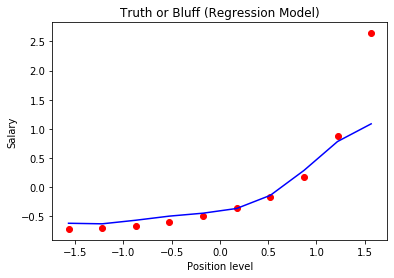

In [10]:
# Visualising the Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Truth or Bluff (Regression Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

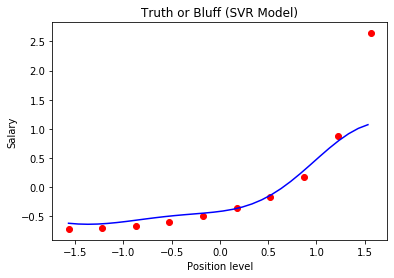

In [11]:
# Visualising the Regression results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (SVR Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [12]:
# Here CEO is not fitted because the SVR model takes this as a outlier